In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [3]:
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

In [4]:
def smooth(scalars, weight=0.9):  # TensorBoard默认平滑系数=0.9
    last = scalars[0]
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

In [5]:
def sample(data, idx, length=10):
    start_idx = idx - length // 2
    end_idx = idx + length // 2 + 1
    if start_idx < 0:
        start_idx = 0
    if end_idx > len(data):
        end_idx = len(data)
    return np.mean(data[start_idx:end_idx]), np.std(data[start_idx:end_idx])

In [6]:
def mean_std_plot(data, label, color, std_scale=1, length=10):
    x = np.arange(len(data))
    means, std = [], []
    for i in range(len(data)):
        m, s = sample(data, i, length=length)
        means.append(m)
        std.append(s)
    plt.plot(x, means, label=label, color=color, linewidth=1)
    plt.fill_between(x, np.array(means) - std_scale * np.array(std), np.array(means) + std_scale * np.array(std), color=color, alpha=0.2, linewidth=0)

In [7]:
vdn = read_json_file('./vdn.txt')
qmix = read_json_file('./qmix.txt')
avdn = read_json_file('./avdn.txt')
attvdn = read_json_file('./attvdn.txt')

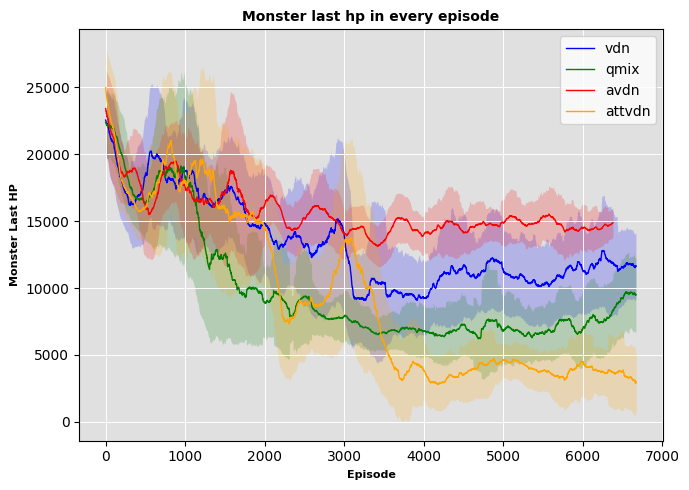

In [8]:
plt.figure(figsize=(7, 5), )

length, std_scale = 200, 1
mean_std_plot(vdn, label='vdn', color='blue', std_scale=std_scale, length=length)
mean_std_plot(qmix, label='qmix', color='green', std_scale=std_scale, length=length)
mean_std_plot(avdn, label='avdn', color='red', std_scale=std_scale, length=length)
mean_std_plot(attvdn, label='attvdn', color='orange', std_scale=std_scale, length=length)
plt.xlabel('Episode', fontdict={'fontsize': 8, 'fontweight': 'bold'})
plt.ylabel('Monster Last HP', fontdict={'fontsize': 8, 'fontweight': 'bold'})
plt.title('Monster last hp in every episode', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.legend()
plt.grid(True, color='white', linestyle='-', linewidth=0.7)
ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.set_facecolor('#E0E0E0')
# plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

plt.tight_layout()
plt.savefig('monster_last_hp.png', dpi=600)

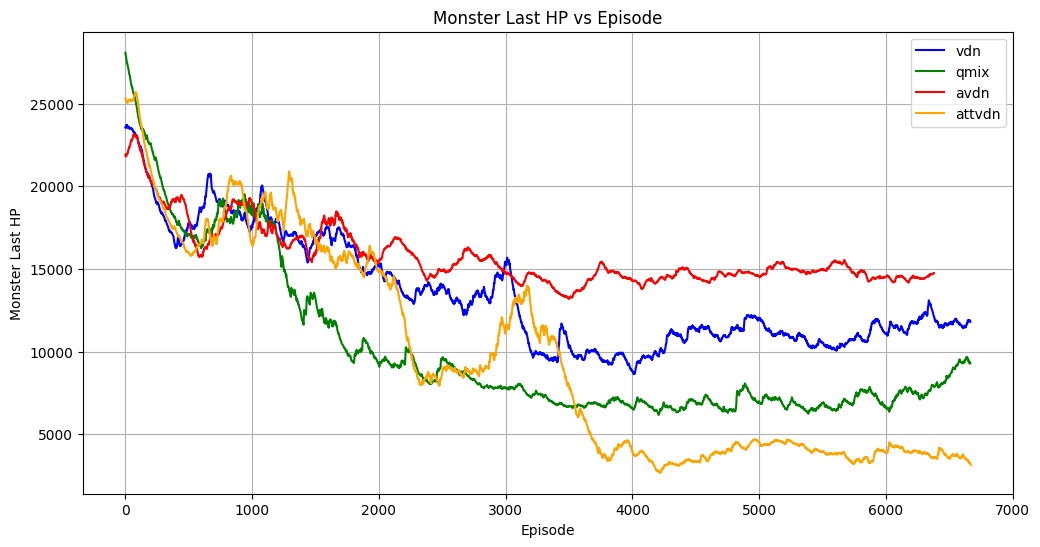

In [9]:
weight = 0.99
plt.figure(figsize=(12, 6))
plt.plot(list(range(len(vdn))), smooth(vdn, weight=weight), label='vdn', color='blue')
plt.plot(list(range(len(qmix))), smooth(qmix, weight=weight), label='qmix', color='green')
plt.plot(list(range(len(avdn))), smooth(avdn, weight=weight), label='avdn', color='red')
plt.plot(list(range(len(attvdn))), smooth(attvdn, weight=weight), label='attvdn', color='orange')
plt.xlabel('Episode')
plt.ylabel('Monster Last HP')
plt.title('Monster Last HP vs Episode')
plt.legend()
plt.grid()

In [10]:
idx=3020
np.sum(np.array(qmix) == 0)

np.int64(0)

In [13]:
np.sum(np.array(attvdn) == 0)

np.int64(71)